In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv('pollution_dataset.csv')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    199 non-null    float64
 1   Humidity                       199 non-null    float64
 2   PM2.5                          199 non-null    float64
 3   PM10                           199 non-null    float64
 4   NO2                            199 non-null    float64
 5   SO2                            199 non-null    float64
 6   CO                             199 non-null    float64
 7   Proximity_to_Industrial_Areas  199 non-null    float64
 8   Population_Density             199 non-null    int64  
 9   Air Quality                    199 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 15.7+ KB


In [148]:
X = pd.get_dummies(df.drop('Air Quality',axis=1))

In [149]:
y = df['Air Quality']

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
model = DecisionTreeClassifier()

In [154]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [155]:
out_preds = model.predict(X_test) 

In [156]:
out_preds

array(['Good', 'Good', 'Hazardous', 'Hazardous', 'Moderate', 'Moderate',
       'Moderate', 'Good', 'Good', 'Moderate', 'Good', 'Good', 'Poor',
       'Good', 'Good', 'Poor', 'Good', 'Moderate', 'Good', 'Hazardous',
       'Good', 'Moderate', 'Good', 'Moderate', 'Poor', 'Good', 'Moderate',
       'Moderate', 'Hazardous', 'Moderate', 'Poor', 'Good', 'Good',
       'Hazardous', 'Poor', 'Moderate', 'Poor', 'Moderate', 'Poor',
       'Good', 'Good', 'Moderate', 'Hazardous', 'Good', 'Good', 'Good',
       'Hazardous', 'Good', 'Poor', 'Moderate', 'Good', 'Good',
       'Moderate', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Moderate'], dtype=object)

In [157]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [158]:
print(classification_report(y_test,out_preds))

              precision    recall  f1-score   support

        Good       0.93      1.00      0.96        27
   Hazardous       0.71      0.71      0.71         7
    Moderate       0.88      0.82      0.85        17
        Poor       0.62      0.56      0.59         9

    accuracy                           0.85        60
   macro avg       0.79      0.77      0.78        60
weighted avg       0.84      0.85      0.85        60



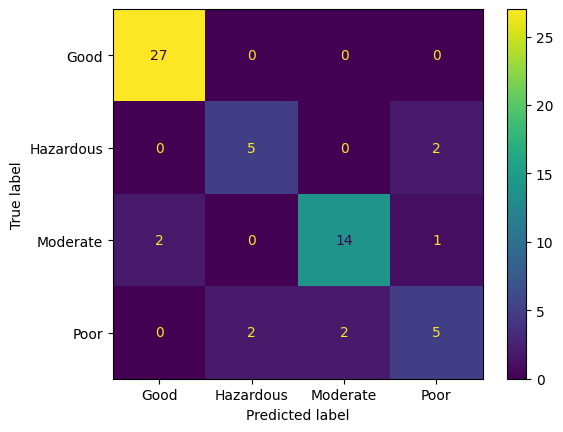

In [159]:
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [160]:
from sklearn.tree import plot_tree

[Text(0.68, 0.9375, 'Proximity_to_Industrial_Areas <= 9.75\ngini = 0.718\nsamples = 139\nvalue = [49.0, 18.0, 44.0, 28.0]'),
 Text(0.48, 0.8125, 'CO <= 1.77\ngini = 0.624\nsamples = 87\nvalue = [0.0, 18.0, 43.0, 26.0]'),
 Text(0.28, 0.6875, 'Population_Density <= 738.0\ngini = 0.269\nsamples = 50\nvalue = [0, 0, 42, 8]'),
 Text(0.24, 0.5625, 'NO2 <= 37.1\ngini = 0.159\nsamples = 46\nvalue = [0, 0, 42, 4]'),
 Text(0.16, 0.4375, 'SO2 <= 22.45\ngini = 0.089\nsamples = 43\nvalue = [0, 0, 41, 2]'),
 Text(0.12, 0.3125, 'Temperature <= 25.2\ngini = 0.046\nsamples = 42\nvalue = [0, 0, 41, 1]'),
 Text(0.08, 0.1875, 'PM10 <= 32.75\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 1]'),
 Text(0.04, 0.0625, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.12, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.16, 0.1875, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38, 0]'),
 Text(0.2, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.32, 0.4375, 'CO <= 1.58\ngini 

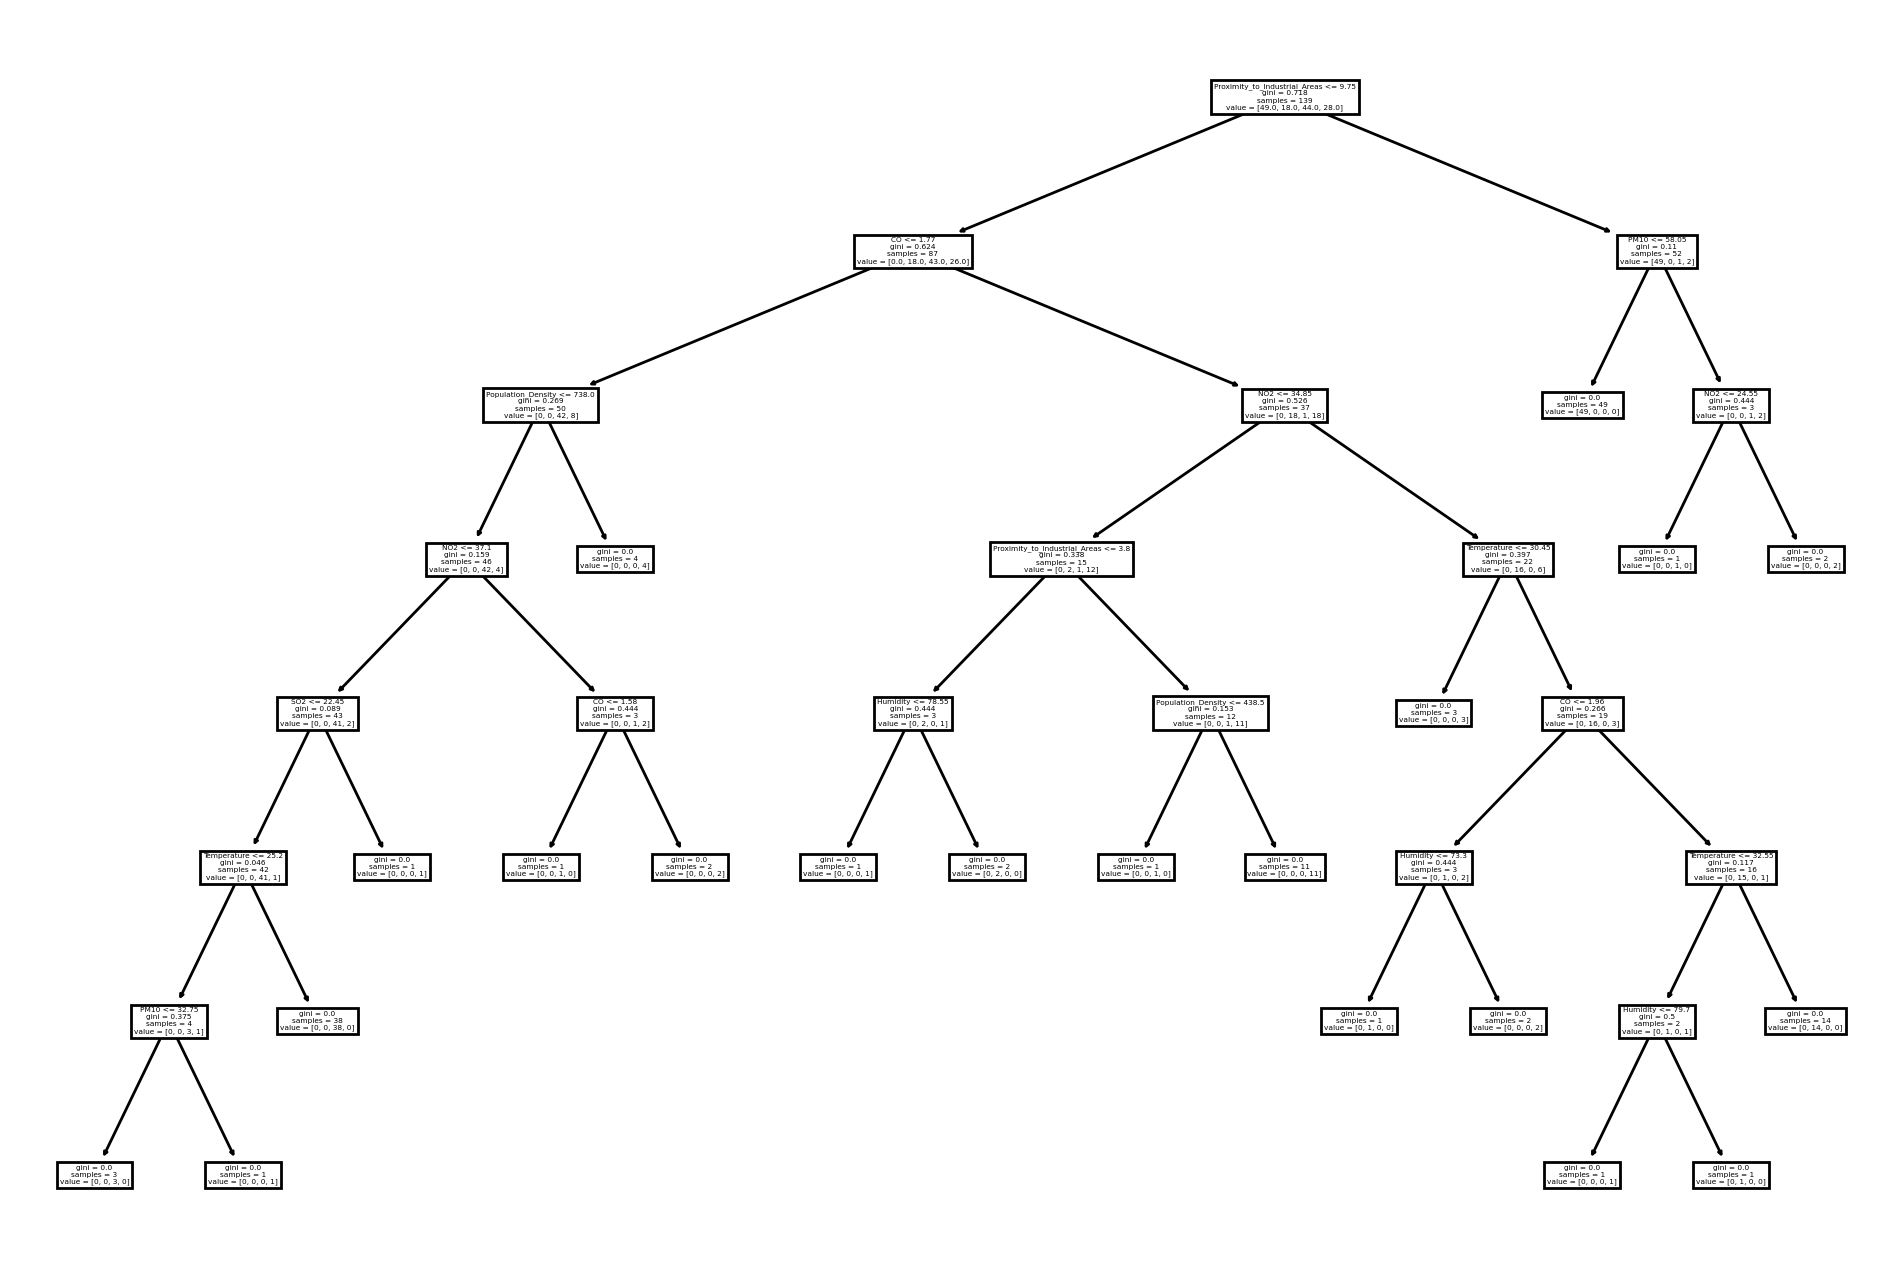

In [161]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,feature_names = X.columns)